# **Reporte del modelo baseline**
---


## **1. Alcance**

Se busca implementar un modelo que a partir de ciertas características del café, permita identificar cuáles de ellas determinan una bebida de calidad. Al lograr esta clasificación, tanto los productores como los propietarios de cafeterías podrán enfocar sus esfuerzos en los aspectos que el modelo señale como más relevantes para ofrecer un café de alta calidad.

Además de clasificar las características que definen un café de calidad, este proyecto también tiene como objetivo predecir el puntaje total que podría obtener una muestra de café, a partir de las calificaciones asignadas a atributos específicos del mismo. Este enfoque permitirá no solo identificar los factores determinantes de la calidad, sino también anticipar el resultado global que una evaluación profesional podría otorgar, brindando así una herramienta útil para productores, catadores y comercializadores en la toma de decisiones.

## **2. Datos**


Los datos utilizados en este proyecto corresponden a variedades de café evaluadas por el Instituto de la Calidad del Café (Coffee Quality Institute, CQI por sus siglas en inglés), y están disponibles públicamente a través del siguiente enlace: https://database.coffeeinstitute.org/.

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Cargar el archivo CSV
df = pd.read_csv('data.csv', sep=';')
df.head(4)
# Preprocesamiento
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')
df['Flavor'] = pd.to_numeric(df['Flavor'], errors='coerce')
df['Aftertaste'] = pd.to_numeric(df['Aftertaste'], errors='coerce')
df['Cupper.Points'] = pd.to_numeric(df['Cupper.Points'], errors='coerce')
df['Moisture'] = pd.to_numeric(df['Moisture'], errors='coerce')
df['Sweetness'] = pd.to_numeric(df['Sweetness'], errors='coerce')
df['Clean.Cup'] = pd.to_numeric(df['Clean.Cup'], errors='coerce')
df = df.apply(lambda col: col.fillna(col.mean()) if col.dtype in ['float64', 'int64'] else col)
columnas = ['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness']
for col in columnas:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a numérico si no lo es
    media_columna = df.loc[df[col] != 900, col].mean()  # Calcula la media sin incluir los 900
    df[col] = df[col].replace(900, media_columna)  # Reemplaza 900 por la media

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311 entries, 0 to 1310
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1311 non-null   int64  
 1   Species                1311 non-null   object 
 2   Owner                  1304 non-null   object 
 3   Country.of.Origin      1310 non-null   object 
 4   Farm.Name              955 non-null    object 
 5   Lot.Number             270 non-null    object 
 6   Mill                   1000 non-null   object 
 7   ICO.Number             1162 non-null   object 
 8   Company                1101 non-null   object 
 9   Altitude               1087 non-null   object 
 10  Region                 1253 non-null   object 
 11  Producer               1078 non-null   object 
 12  Number.of.Bags         1311 non-null   float64
 13  Bag.Weight             1307 non-null   object 
 14  In.Country.Partner     1307 non-null   object 
 15  Harv

## **3. Descripción del modelo**
---


Se quiere determinar la calidad del café con base a variables como el cuerpo, la uniformidad, el balance, puntos de taza, entre otros. Con este objetivo se explorará algunas de las técnicas de aprendizaje supervisado: Análisis de regresión.

Para el análisis de regresión, se tomará una serie de variables como predictoras ('Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity') y una variable de respuesta continua que corresponde al puntaje total de la taza.

## **4.0 Entrenamiento del Modelo y Selección de Hiperparámetros**
---



### 4.1 Análisis de un modelo de regresión

In [ ]:
X = df[['Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points', 'Moisture', 'Flavor', 'Aftertaste', 'Acidity']]
y = df["Total.Cup.Points"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsRegressor(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
y_pred = knn.predict(X_test_scaled)
print(y_pred)

[80.29666667 80.48222222 84.16777778 83.01888889 83.51111111 82.42555556
 84.51       79.73111111 82.09111111 83.27777778 84.12111111 83.59222222
 79.41555556 83.01       81.72222222 81.08444444 83.40777778 80.75111111
 83.10222222 83.86111111 84.41777778 85.03555556 82.05555556 81.98222222
 83.45333333 78.62       83.21333333 84.07444444 81.90888889 82.19555556
 80.95038344 83.34222222 85.40777778 81.99       84.72222222 83.77
 77.91555556 84.12222222 82.99111111 79.05666667 82.23       83.40777778
 83.27777778 81.53666667 82.19666667 80.82444444 85.09333333 80.66666667
 76.84222222 82.64888889 83.86       83.11111111 85.60888889 84.51111111
 81.98222222 83.51777778 82.37       82.69444444 82.56444444 85.71222222
 82.13888889 81.95444444 84.21444444 84.14888889 82.01888889 79.43444444
 86.77888889 85.93555556 81.86888889 82.37111111 84.12111111 73.53888889
 82.57444444 84.45444444 82.63       84.02777778 81.50888889 84.01888889
 82.24111111 82.39888889 83.88888889 83.76888889 79.52777

## 6.0 Evaluación del modelo
---



In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 0.48
Coeficiente de determinación (R²): 0.93


In [ ]:
valores_k = list(range(1, 15))  # Puedes ajustar el rango
resultados = []

In [ ]:
for k in valores_k:
    modelo = KNeighborsRegressor(n_neighbors=k)
    modelo.fit(X_train_scaled, y_train)
    y_pred = modelo.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    resultados.append({"k": k, "MSE": mse, "R2": r2})

resultados_df = pd.DataFrame(resultados)
print(resultados_df)

     k       MSE        R2
0    1  0.437125  0.933578
1    2  0.374382  0.943112
2    3  0.383813  0.941679
3    4  0.417075  0.936625
4    5  0.440989  0.932991
5    6  0.429298  0.934768
6    7  0.454730  0.930903
7    8  0.475943  0.927680
8    9  0.479466  0.927144
9   10  0.540293  0.917902
10  11  0.557556  0.915279
11  12  0.566533  0.913915
12  13  0.566733  0.913884
13  14  0.599405  0.908919


### 6.1 Aplicación del modelo
---



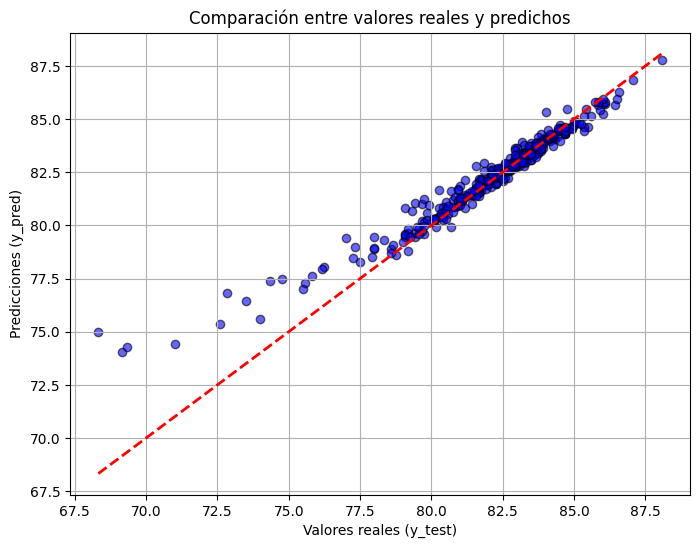

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores reales (y_test)")
plt.ylabel("Predicciones (y_pred)")
plt.title("Comparación entre valores reales y predichos")
plt.grid(True)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor

# X: tus variables independientes
# y: tu variable objetivo

# 1. Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Crear el modelo
knn = KNeighborsRegressor(n_neighbors=2)

# 3. Validación cruzada con 5 particiones
scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='r2')

# 4. Mostrar resultados
print("Puntajes R² por fold:", scores)
print("Promedio R²:", scores.mean())


Puntajes R² por fold: [-1.88127128 -1.97384931 -3.83004201 -1.69757245 -0.28026812]
Promedio R²: -1.9326006356372551


Un R² negativo indica que el modelo predice peor que simplemente usar la media de la variable objetivo.

<Axes: xlabel='Total.Cup.Points', ylabel='Count'>

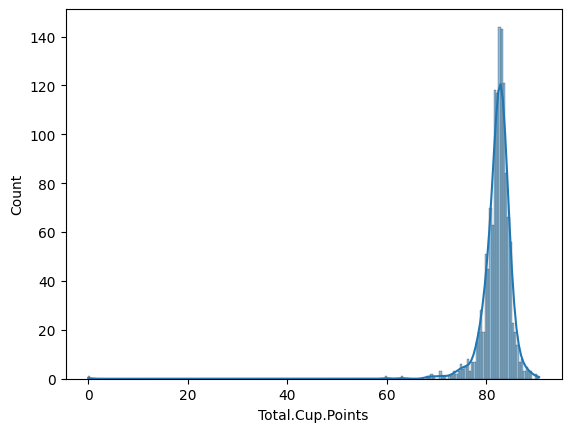

In [ ]:
import seaborn as sns
sns.histplot(y, kde=True)

In [ ]:
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=5, scoring='r2')
    print(f"k = {k}, R² promedio = {scores.mean():.4f}")

k = 1, R² promedio = -2.4773
k = 2, R² promedio = -1.9326
k = 3, R² promedio = -1.7567
k = 4, R² promedio = -1.6270
k = 5, R² promedio = -1.5388
k = 6, R² promedio = -1.4238
k = 7, R² promedio = -1.3786
k = 8, R² promedio = -1.3207
k = 9, R² promedio = -1.3079
k = 10, R² promedio = -1.3276
k = 11, R² promedio = -1.3467
k = 12, R² promedio = -1.3558
k = 13, R² promedio = -1.3476
k = 14, R² promedio = -1.3321
k = 15, R² promedio = -1.3484
k = 16, R² promedio = -1.3371
k = 17, R² promedio = -1.3237
k = 18, R² promedio = -1.3246
k = 19, R² promedio = -1.3572
k = 20, R² promedio = -1.3597


## 7.0 **Conclusión**
---

 El modelo no predice bien. No parece estar aprendiendo. Pareciera que tengo un sobreajuste. Considero seleccionar otro modelo.